In [12]:
import requests
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

from db import DB
from sdssimg import SDSS

In [3]:
db = DB()
sdss = SDSS()
sdss_url = "http://skyserver.sdss.org/dr14/SkyServerWS/ImgCutout/getjpeg"

In [5]:
sdss.db_read(10)
sdss.coords

[(587722981741363294, 182.92526, -1.092357),
 (587722981741363323, 182.97011, -1.2195373),
 (587722981741559888, 183.4381, -1.2384139),
 (587722981741625481, 183.474, -1.2314292),
 (587722981741625484, 183.47778, -1.0846035),
 (587722981741625520, 183.5262, -1.1640114),
 (587722981741625545, 183.56682, -1.1358945),
 (587722981741756545, 183.82603, -1.1098486),
 (587722981741756579, 183.9019, -1.1739819),
 (587722981741822057, 183.96939, -1.2039951)]

In [30]:
def get_coord(index):
    coord = sdss.coords[index]
    return coord[1], coord[2]

In [36]:
def get_img(ra, dec, jpeg_size, scale=0.4):
    img_url = sdss_url + f"?ra={ra:.5f}&dec={dec:.5f}&width={jpeg_size}&height={jpeg_size}&scale={scale}"
    return requests.get(img_url, stream=True)

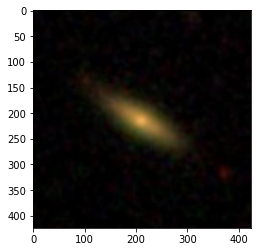

In [40]:
ra, dec = get_coord(8)
img_data = get_img(ra, dec, 424, 0.1)
img = Image.open(img_data.raw)

plt.imshow(img);

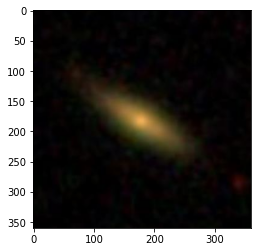

In [41]:
img_data = get_img(ra, dec, 360, 0.1)
img = Image.open(img_data.raw)
plt.imshow(img);